In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [55]:
temp = pd.read_excel('temp_do_cond.xlsx', sheet_name='Temp', parse_dates = ['Date Time, GMT-08:00'])
temp = temp.copy()[['Date Time, GMT-08:00', 'Temp, °C ', 'Location']]
temp.columns = ['time', 'temp_C', 'site']

do = pd.read_excel('temp_do_cond.xlsx', sheet_name='DO', parse_dates=['Date Time, GMT-08:00'])
do = do.copy()[['Date Time, GMT-08:00', 'DO conc, mg/L', 'Temp, °C', 'Location']]
do.columns = ['time', 'do_mgl', 'temp_C_do', 'site']

cond = pd.read_excel('temp_do_cond.xlsx', sheet_name='Cond', parse_dates=['Date Time, GMT-08:00'])
cond = cond.copy()[['Date Time, GMT-08:00', 'Full Range, μS/cm', 'Temp, °C', 'Location']]
cond.columns = ['time', 'cond_uscm', 'temp_C_cond', 'site']

par = pd.read_excel('temp_do_cond.xlsx', sheet_name='PAR', parse_dates=['Date Time, GMT-08:00'])
par = par.copy()[['Date Time, GMT-08:00', 'Intensity, Lux', 'Temp, °C', 'Location']]
par.columns = ['time', 'par_intlux', 'temp_C_par', 'site']

In [56]:
temp['site'].unique()

array(['N-TKL_884', 'RCBP2.1', 'N_TKL_917', 'RCBP2.2', 'N_TKL_524',
       'SRBP1', 'Temperature on osmosampler TKL_917',
       'Temperature on osmosampler SRBP1',
       'Temperature on osmosampler TKL_884',
       'Temperature on osmosampler TKL_524'], dtype=object)

In [57]:
df = pd.merge(temp, do, on=['time', 'site'], how='outer')
df = df.merge(cond, on=['time', 'site'], how='outer')
df = df.merge(par, on=['time', 'site'], how='outer')

df['date'] = df['time'].dt.date
df = df.groupby(by=['site', 'date']).mean().reset_index()

/tmp/ipykernel_2214/3629557074.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(by=['site', 'date']).mean().reset_index()


In [58]:
df.to_csv('temp_do_cond_cleaned.csv')

In [59]:
df['site'].unique()

array(['N-TKL_884', 'N_TKL_524', 'N_TKL_917', 'RCBP2.1', 'RCBP2.2',
       'SRBP1', 'Temperature on osmosampler SRBP1',
       'Temperature on osmosampler TKL_524',
       'Temperature on osmosampler TKL_884',
       'Temperature on osmosampler TKL_917'], dtype=object)

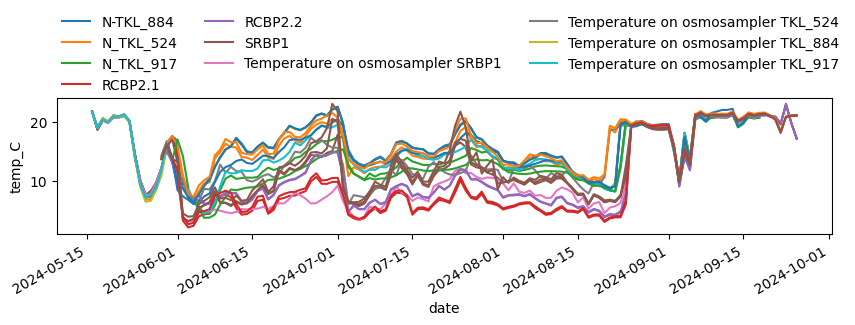

In [60]:
fig, ax=plt.subplots(figsize=(10,2))
sns.lineplot(data=df, x='date', y='temp_C',hue='site', ax=ax)
sns.lineplot(data=df, x='date', y='temp_C_do', hue='site', ax=ax, legend=False)
sns.lineplot(data=df, x='date', y='temp_C_cond',hue='site', ax=ax, legend=False)
sns.lineplot(data=df, x='date', y='temp_C_par',hue='site', ax=ax, legend=False)

ax.legend(ncol=3, frameon=False, loc=(0,1))

fig.autofmt_xdate()

<Axes: xlabel='date', ylabel='do_mgl'>

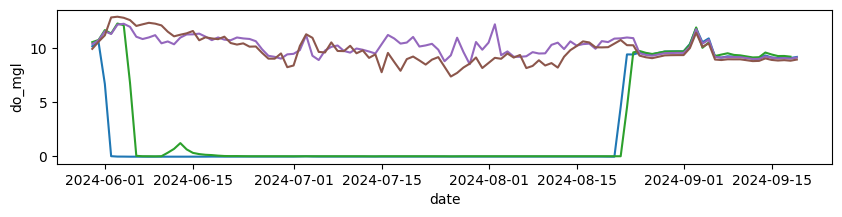

In [61]:
fig, ax=plt.subplots(figsize=(10,2))
sns.lineplot(data=df, x='date', y='do_mgl',hue='site', ax=ax, legend=False)

<Axes: xlabel='date', ylabel='cond_uscm'>

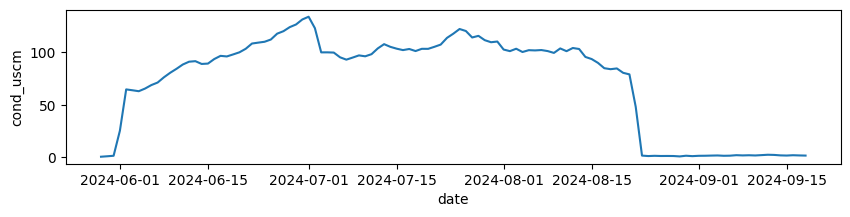

In [62]:
fig, ax=plt.subplots(figsize=(10,2))
sns.lineplot(data=df, x='date', y='cond_uscm',hue='site', ax=ax, legend=False)

<Axes: xlabel='date', ylabel='par_intlux'>

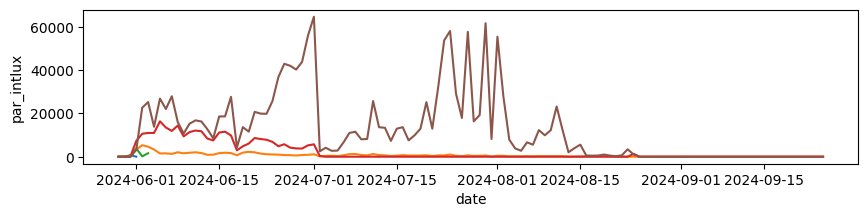

In [63]:
fig, ax=plt.subplots(figsize=(10,2))
sns.lineplot(data=df, x='date', y='par_intlux',hue='site', ax=ax, legend=False)